In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1) #Median house value is the target variable
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20 percent for testing

In [9]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

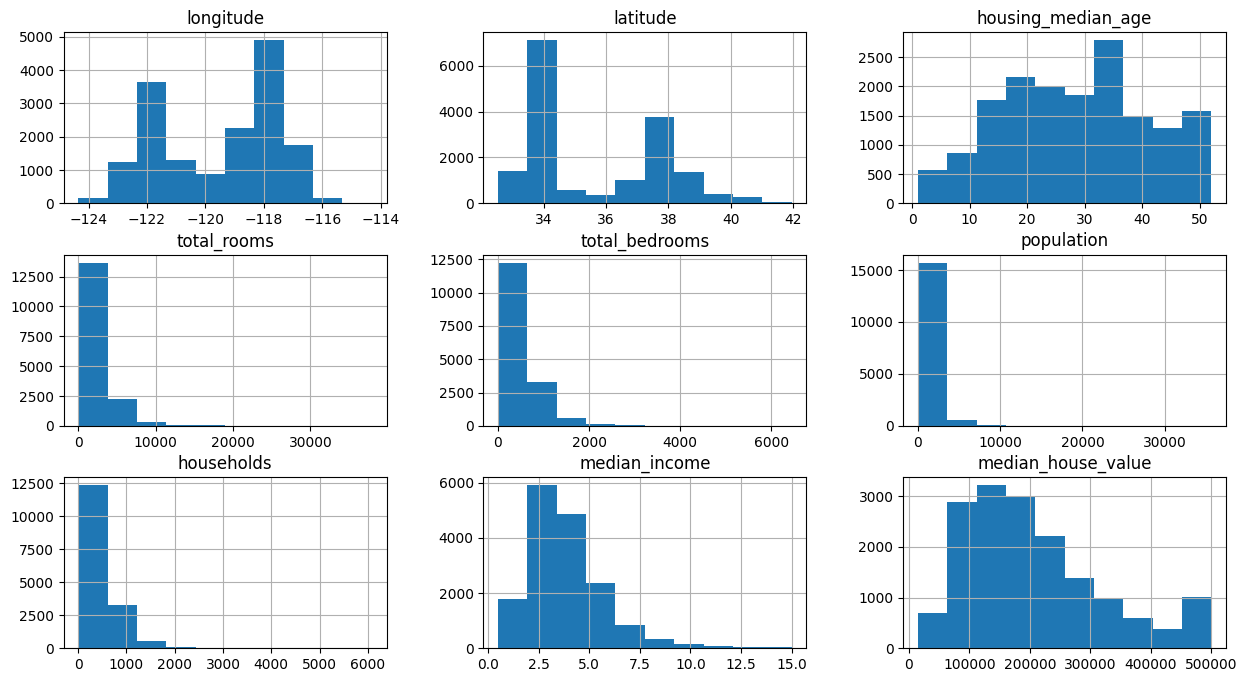

In [10]:
train_data.hist(figsize=(15,8))

<Axes: >

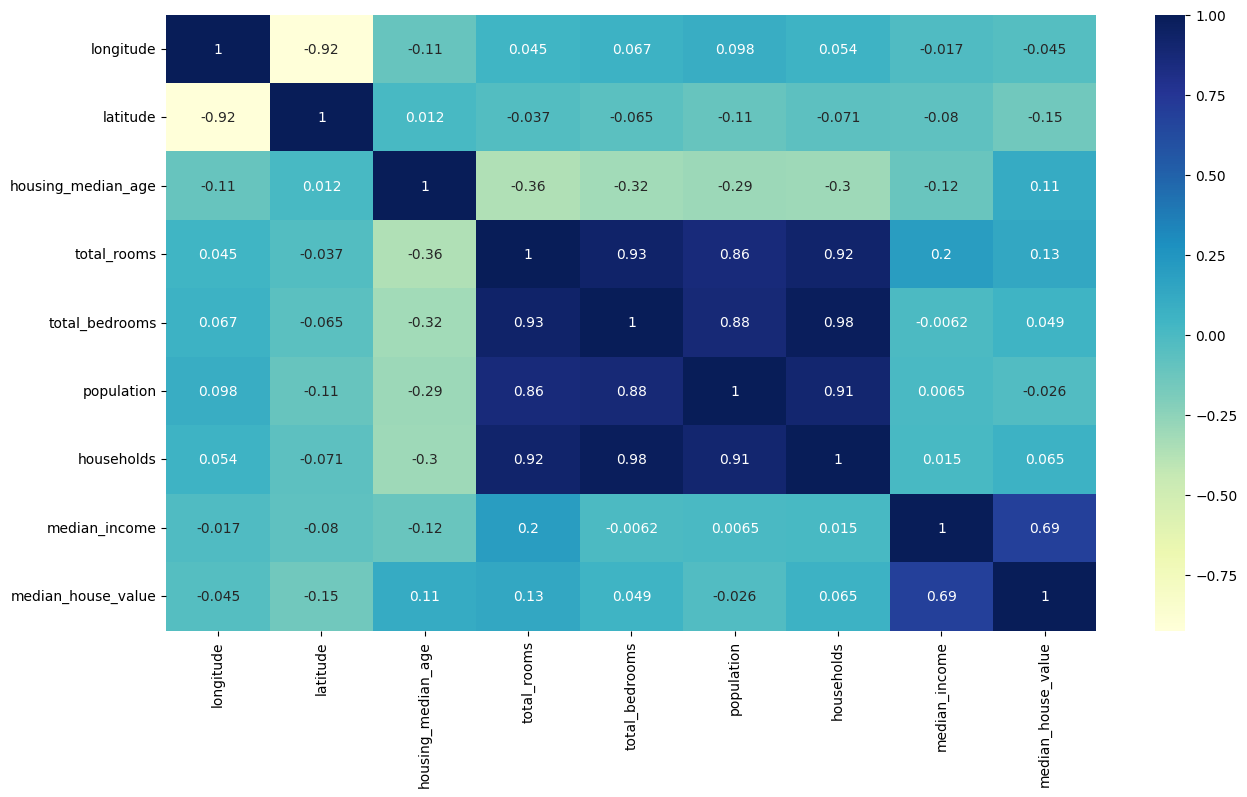

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

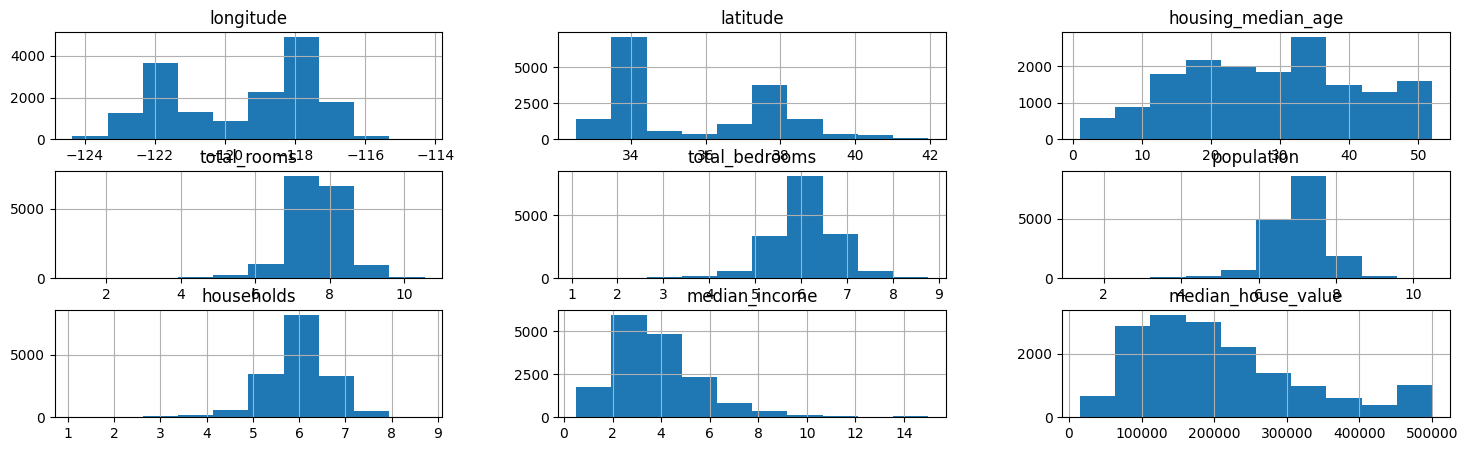

In [13]:
train_data.hist(figsize=(18,5))

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14005,-117.18,32.76,52.0,7.612831,5.710427,6.476972,5.655992,4.7396,NEAR OCEAN,441700.0
8590,-118.39,33.89,40.0,6.717805,4.969813,5.966147,4.997212,7.1845,<1H OCEAN,438100.0
20321,-119.16,34.23,26.0,8.602453,7.165493,8.216358,7.055313,2.7556,NEAR OCEAN,213200.0
18170,-122.02,37.36,25.0,7.637716,5.961005,7.149917,5.950643,4.7609,<1H OCEAN,378000.0
8901,-118.48,34.04,49.0,8.237744,6.609349,7.269617,6.538140,4.3158,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
9420,-122.62,37.85,30.0,6.726233,5.105945,5.883322,4.969813,6.8198,NEAR OCEAN,493800.0
8425,-118.34,33.92,29.0,7.297091,5.857933,6.873164,5.916202,3.3558,<1H OCEAN,199600.0
16899,-122.34,37.59,44.0,7.241366,5.598422,6.602588,5.666427,5.6206,NEAR OCEAN,386400.0
10246,-117.87,33.90,21.0,8.065265,6.104793,7.256297,6.152733,6.8268,<1H OCEAN,280300.0


In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1) #Ocean proximity likely influences value of housing

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14005,-117.18,32.76,52.0,7.612831,5.710427,6.476972,5.655992,4.7396,441700.0,False,False,False,False,True
8590,-118.39,33.89,40.0,6.717805,4.969813,5.966147,4.997212,7.1845,438100.0,True,False,False,False,False
20321,-119.16,34.23,26.0,8.602453,7.165493,8.216358,7.055313,2.7556,213200.0,False,False,False,False,True
18170,-122.02,37.36,25.0,7.637716,5.961005,7.149917,5.950643,4.7609,378000.0,True,False,False,False,False
8901,-118.48,34.04,49.0,8.237744,6.609349,7.269617,6.538140,4.3158,500001.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9420,-122.62,37.85,30.0,6.726233,5.105945,5.883322,4.969813,6.8198,493800.0,False,False,False,False,True
8425,-118.34,33.92,29.0,7.297091,5.857933,6.873164,5.916202,3.3558,199600.0,True,False,False,False,False
16899,-122.34,37.59,44.0,7.241366,5.598422,6.602588,5.666427,5.6206,386400.0,False,False,False,False,True
10246,-117.87,33.90,21.0,8.065265,6.104793,7.256297,6.152733,6.8268,280300.0,True,False,False,False,False


<Axes: >

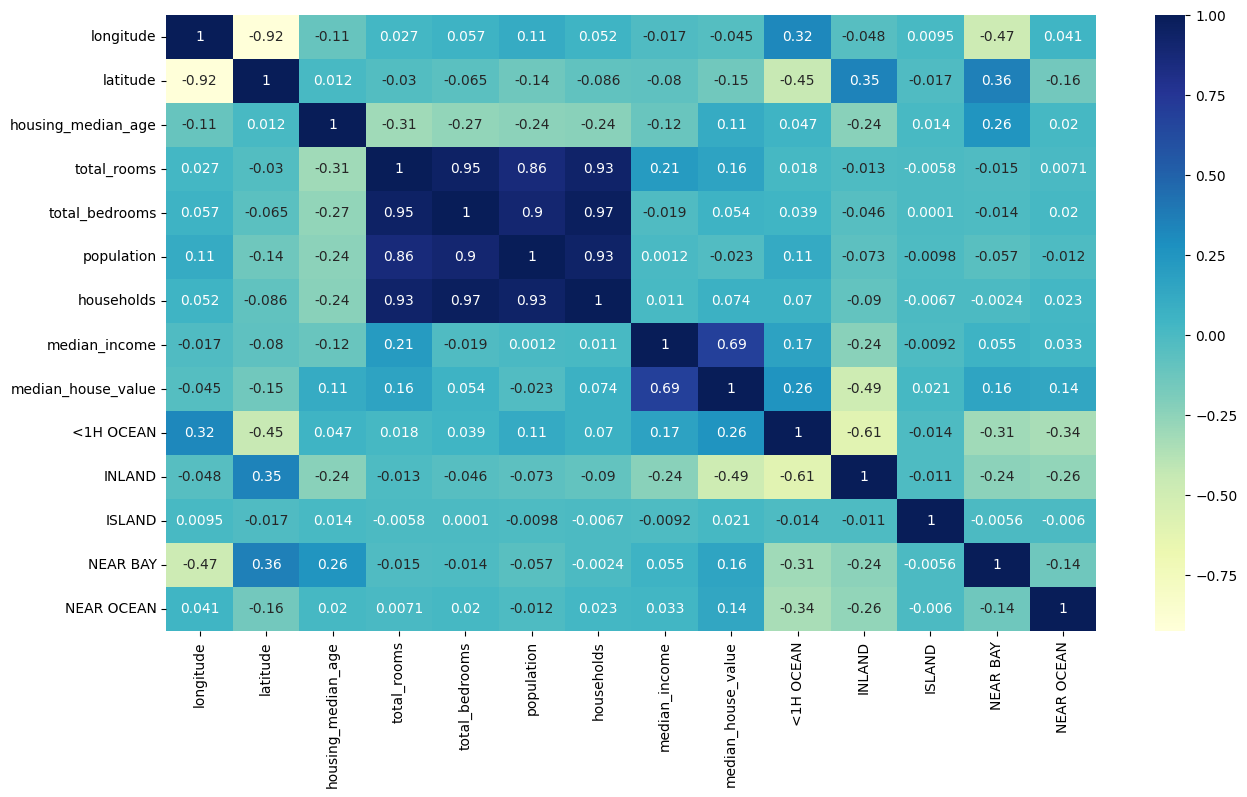

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

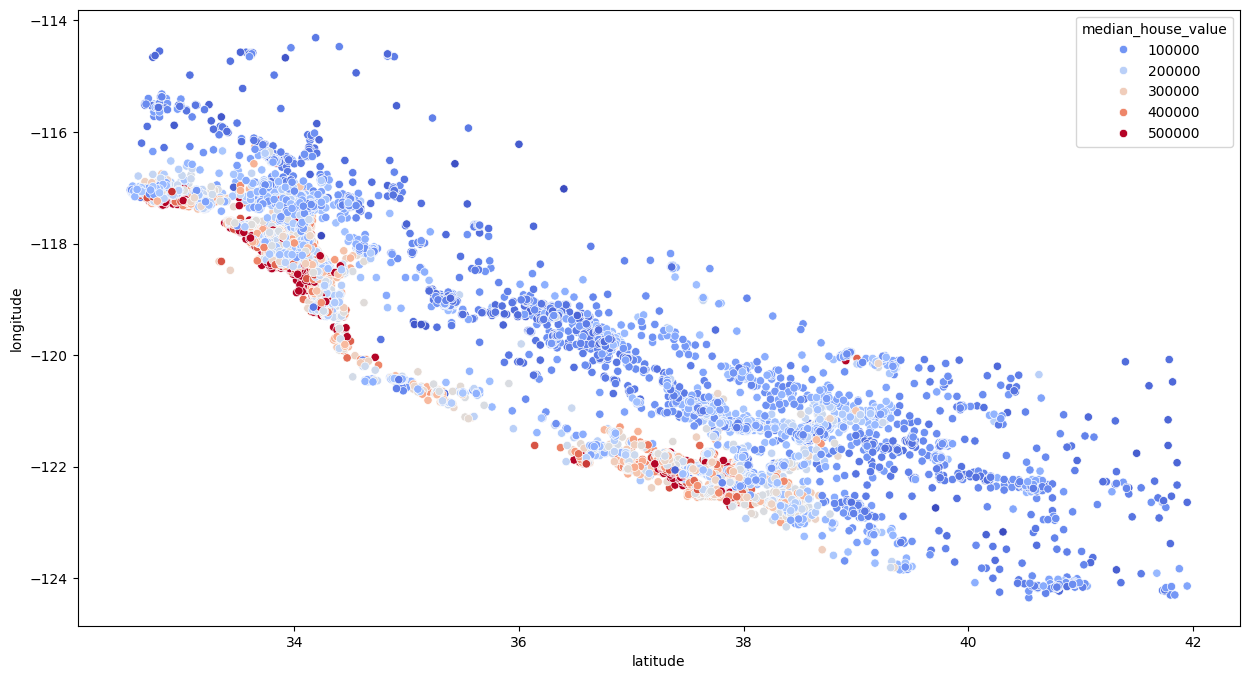

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm") 

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

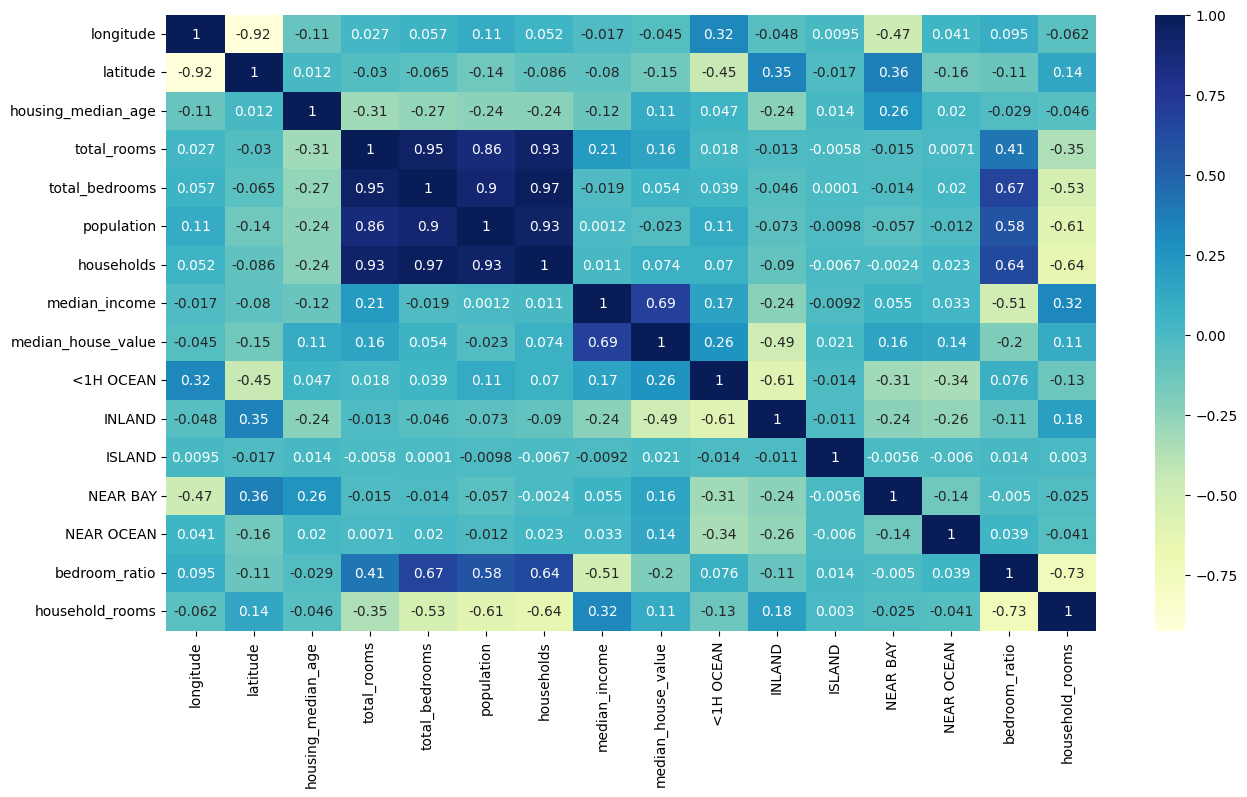

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)


reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [22]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

In [23]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1) #Ocean proximity likely influences value of housing

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [24]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [25]:
X_test_s = scaler.transform(X_test)

In [26]:
reg.score(X_test_s, y_test)

0.6556048484466226

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [28]:
forest.score(X_test_s,y_test)

0.8165376228245108

In [29]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100], #provided 10, 30, 100 initially, gave 100 as best
    "min_samples_split": [8], # provided 2,4,8 initially, gave 8 as best
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [8], 'n_estimators': [100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
best_forest = grid_search.best_estimator_

In [31]:
best_forest.score(X_test_s, y_test)

0.8163919719090016